In [1]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import jieba
import sys
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfVectorizer
from glob import glob
import os
import pandas as pd
% matplotlib inline

In [2]:
file_list = glob('20*.txt')
type(file_list)

list

In [3]:
t = []
for file in file_list:
    with open(file ,'r', encoding = 'utf-8') as f:
        ttolines = []
        for line in f:
            ttolines.append(line)
    t.append(ttolines)

In [4]:
def text_cut(d, dic_vector):
    for article in d:
        seg_list = jieba.cut(article) 
        string_list = "|".join(seg_list).split('|')
        for s in string_list:
            if not (s in dic_vector.keys()):
                dic_vector[s] = 1
            else:
                dic_vector[s] += 1
    return dic_vector

In [5]:
div_vector = {}
div_vector = text_cut(t[0],div_vector)
df = pd.DataFrame(div_vector,index = [0])
#把每一篇文章中的句子切成詞組並存進DataFrame裡
for i in range(1,len(t)):
    div_vector = {}
    div_vector = text_cut(t[i],div_vector)
    temp_df = pd.DataFrame(div_vector,index=[0])
    #把不同篇文章的詞組以columns連接起來
    df = pd.concat([df,temp_df],ignore_index=True)
#把缺失值用0替代
df = df.fillna(0)
df

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\USER\AppData\Local\Temp\jieba.cache
Loading model cost 2.270 seconds.
Prefix dict has been built succesfully.


,,,!,"""",#,$,%,&,(,),...,﻿,！,％,（,）,＋,，,／,：,；
0,1523,1115,0.0,2.0,0.0,9.0,4.0,2.0,183,183,...,1,0.0,0.0,12,12,0.0,508,0.0,85,23
1,202,74,0.0,0.0,0.0,0.0,0.0,0.0,4,4,...,1,1.0,0.0,1,1,0.0,149,0.0,10,13
2,206,175,0.0,0.0,0.0,0.0,1.0,0.0,97,97,...,1,0.0,1.0,4,4,0.0,64,0.0,43,3
3,209,99,0.0,0.0,0.0,0.0,0.0,0.0,10,10,...,1,1.0,0.0,2,2,0.0,141,0.0,9,12
4,1597,1006,1.0,0.0,2.0,9.0,4.0,1.0,187,187,...,1,0.0,0.0,16,16,1.0,572,1.0,78,25
5,200,178,0.0,0.0,0.0,0.0,1.0,0.0,93,93,...,1,0.0,1.0,4,4,0.0,83,0.0,45,3


In [6]:
df_drop = df.drop(df.columns.tolist()[0:2294]+df.columns.tolist()[10392:10405],axis=1)
df_drop

,吊,吊式,同,同仁,同將,同心,同時,同時爭,同時通,同期,...,﻿,！,％,（,）,＋,，,／,：,；
0,1.0,1.0,0.0,13.0,0.0,1.0,3.0,0.0,1.0,0.0,...,1,0.0,0.0,12,12,0.0,508,0.0,85,23
1,0.0,0.0,1.0,3.0,1.0,0.0,3.0,0.0,0.0,0.0,...,1,1.0,0.0,1,1,0.0,149,0.0,10,13
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,...,1,0.0,1.0,4,4,0.0,64,0.0,43,3
3,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,1,1.0,0.0,2,2,0.0,141,0.0,9,12
4,1.0,1.0,1.0,13.0,0.0,1.0,4.0,1.0,1.0,0.0,...,1,0.0,0.0,16,16,1.0,572,1.0,78,25
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0.0,1.0,4,4,0.0,83,0.0,45,3


In [7]:
#對標點符號以外詞組做TF-IDF
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfTransformer  
transformer = TfidfTransformer()  
tfidf = transformer.fit_transform(df_drop.values)  
df_tfidf = pd.DataFrame(tfidf.toarray(), columns = df_drop.columns.tolist())
#把TF-IDF後的詞組中頻率過低的詞組刪除
df_tfidf[df_tfidf>0.01].dropna(axis=1)


,在,大同,對,市場,年,年報,年度,或,技術,投入,...,策略,管理,節能,能源,與,達,配合,，,：,；
0,0.036195,0.080743,0.018097,0.068214,0.062645,0.038979,0.072390,0.022274,0.048724,0.018097,...,0.022274,0.025058,0.036195,0.050116,0.192112,0.080743,0.013921,0.707194,0.118330,0.032019
1,0.130197,0.156237,0.036455,0.057287,0.078118,0.015624,0.093742,0.010416,0.031247,0.031247,...,0.093742,0.015624,0.036455,0.026039,0.203108,0.010416,0.031247,0.775976,0.052079,0.067703
2,0.022444,0.029926,0.119704,0.044889,0.089778,0.037407,0.164593,0.082296,0.029926,0.014963,...,0.014963,0.059852,0.029926,0.014963,0.142148,0.014963,0.029926,0.478815,0.321704,0.022444
3,0.134522,0.118380,0.032285,0.032285,0.134522,0.016143,0.064571,0.037666,0.010762,0.016143,...,0.032285,0.010762,0.026904,0.032285,0.220617,0.037666,0.010762,0.758706,0.048428,0.064571
4,0.031196,0.067591,0.019497,0.081889,0.063692,0.035095,0.067591,0.019497,0.050693,0.016898,...,0.020797,0.037695,0.028596,0.042894,0.171578,0.081889,0.027296,0.743504,0.101387,0.032496
5,0.019074,0.038148,0.114444,0.038148,0.076296,0.044506,0.190741,0.069938,0.031790,0.012716,...,0.012716,0.044506,0.025432,0.012716,0.152593,0.012716,0.025432,0.527716,0.286111,0.019074


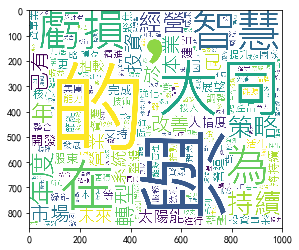

In [8]:
#再觀察一次文字雲並手動刪除不適合的資訊
from wordcloud import WordCloud
import matplotlib.pyplot as plt
tfidf_dict = df_tfidf.to_dict(orient='records')
wordcloud = WordCloud(font_path = 'msjh.ttc', background_color="white",width=1000, height=860, margin=2)
wordcloud.fit_words(tfidf_dict[1])
plt.imshow(wordcloud)
plt.show()

In [9]:
remove_list = ['的','，','；','年','為','大同','大幅度','將持續','整體','資事業','在','與','於','股東','更','年度','已','已有','持續','經營','未來','等','市場','相較','營業','展望','營運','團隊']
for item in remove_list:
    tfidf_dict[1].pop(item, None)

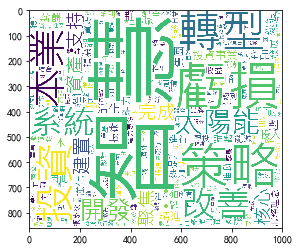

In [10]:
remove_list = ['的','，','；','年','為','大同','大幅度','將持續','整體','資事業','在','與','於','股東','更','年度','已','已有','持續','經營','未來','等','市場','相較','營業','展望','營運','團隊']
for item in remove_list:
    tfidf_dict[1].pop(item, None)
wordcloud = WordCloud(font_path = 'msjh.ttc', background_color="white",width=1000, height=860, margin=2)
wordcloud.fit_words(tfidf_dict[1])
plt.imshow(wordcloud)
plt.show()

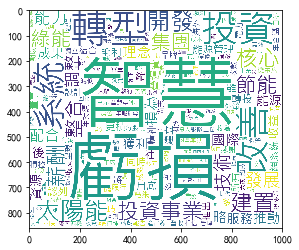

In [15]:
#結果圖呈現
remove_list =['的','，','；','年','為','大同','大幅度','將持續','整體','資事業','在','與','於','股東','更','年度','已','已有','持續','經營','未來','等','市場','相較','營業','展望','營運','團隊']
remove_list = remove_list +['：','精進','完成','強化','本','提升','資產','支持','聚焦','群','進行','本業','產品','投入','因此','活化','而','策略','對']
for item in remove_list:
    tfidf_dict[1].pop(item, None)
wordcloud = WordCloud(font_path = 'msjh.ttc', background_color="white",width=1000, height=860, margin=2)
wordcloud.fit_words(tfidf_dict[1])
plt.imshow(wordcloud)
plt.show()